In [1]:
!pip install lavague

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.2 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
INFO: pip is looking at multiple versions of llama-index-llms-openai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of llama-index-program-openai to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 66.

In [2]:
import os

# Check if running in Google Colab
try:
    from google.colab import userdata
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
else:
    os.environ["OPENAI_API_KEY"] = os.getenv('OPENAI_API_KEY')

In [3]:
from lavague.core.evaluator import RetrieverEvaluator

retriever_evaluator = RetrieverEvaluator()

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/lib/python3.10/dist-
[nltk_data]     packages/llama_index/legacy/_static/nltk_cache...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /usr/local/lib/python3.10/dist-
[nltk_data]     packages/llama_index/legacy/_static/nltk_cache...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/lavague/core/__init__.py:21: UserWarning: Telemetry is turned on. To turn off telemetry, set your LAVAGUE_TELEMETRY to 'NONE'
  warnings.warn(warning_message, UserWarning)


In [4]:
import pandas as pd

raw_dataset = pd.read_parquet("hf://datasets/BigAction/the-meta-wave-raw/data/train-00000-of-00001.parquet")


# Select the first 5 rows
nr = 5
small_df = raw_dataset.head(nr)

In [7]:
from lavague.core.retrievers import OpsmSplitRetriever, BM25HtmlRetriever
from lavague.drivers.selenium import SeleniumDriver

driver = SeleniumDriver()

# tests all = 5 rows
retrieved_data_opsm = retriever_evaluator.evaluate(
    OpsmSplitRetriever(driver), small_df, "retrieved_data_opsm.csv"
)
retrieved_data_bm25 = retriever_evaluator.evaluate(
    BM25HtmlRetriever(), small_df, "retrieved_data_bm25.csv"
)

5it [00:35,  7.05s/it]
5it [00:02,  1.72it/s]


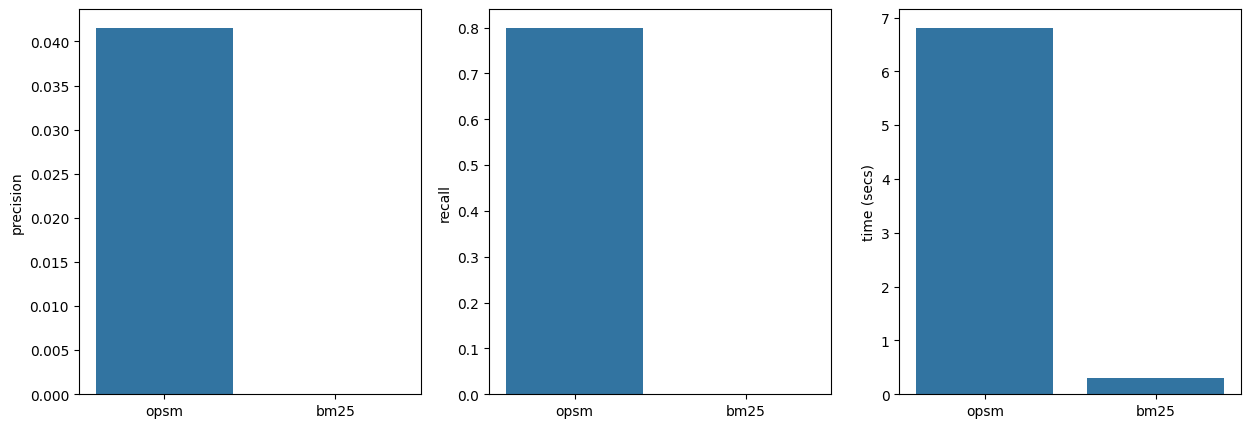

In [8]:
# with as many df as you want
plot = retriever_evaluator.compare(
    {"opsm": retrieved_data_opsm, "bm25": retrieved_data_bm25}
)

# pass arguments with matplotlib
plot.show()

In [9]:
print(f' Opsm: average precision: {retrieved_data_opsm["precision_retriever"].mean(axis=0)}')
print(f' Opsm: average recall: {retrieved_data_opsm["recall_retriever"].mean(axis=0)}')
print(f' BM2: average precision: {retrieved_data_bm25["precision_retriever"].mean(axis=0)}')
print(f' BM25: average recall: {retrieved_data_bm25["recall_retriever"].mean(axis=0)}')


 Opsm: average precision: 0.04157067153995632
 Opsm: average recall: 0.8
 BM2: average precision: 0.0
 BM25: average recall: 0.0


In [11]:
import os

# Check if running in Google Colab
try:
    from google.colab import userdata
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')
else:
    os.environ["GOOGLE_API_KEY"] = os.getenv('GOOGLE_API_KEY')

In [12]:
!pip install lavague-contexts-gemini

INFO: pip is looking at multiple versions of llama-index-embeddings-gemini to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of llama-index-llms-gemini to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of llama-index-llms-gemini to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.7/598.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.8 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.

In [15]:
from lavague.core.evaluator import LLMEvaluator
from lavague.contexts.openai import OpenaiContext
from lavague.contexts.gemini import GeminiContext
from lavague.core.navigation import NavigationEngine
import os
from lavague.drivers.selenium import SeleniumDriver

llm_evaluator = LLMEvaluator()
openai_engine = NavigationEngine.from_context(OpenaiContext(), SeleniumDriver())
gemini_engine = NavigationEngine.from_context(GeminiContext(), SeleniumDriver())
openai_results = llm_evaluator.evaluate(openai_engine, retrieved_data_opsm, "openai_results.csv")
gemini_results = llm_evaluator.evaluate(gemini_engine, retrieved_data_opsm, "gemini_results.csv")

5it [00:37,  7.45s/it]
5it [00:21,  4.39s/it]


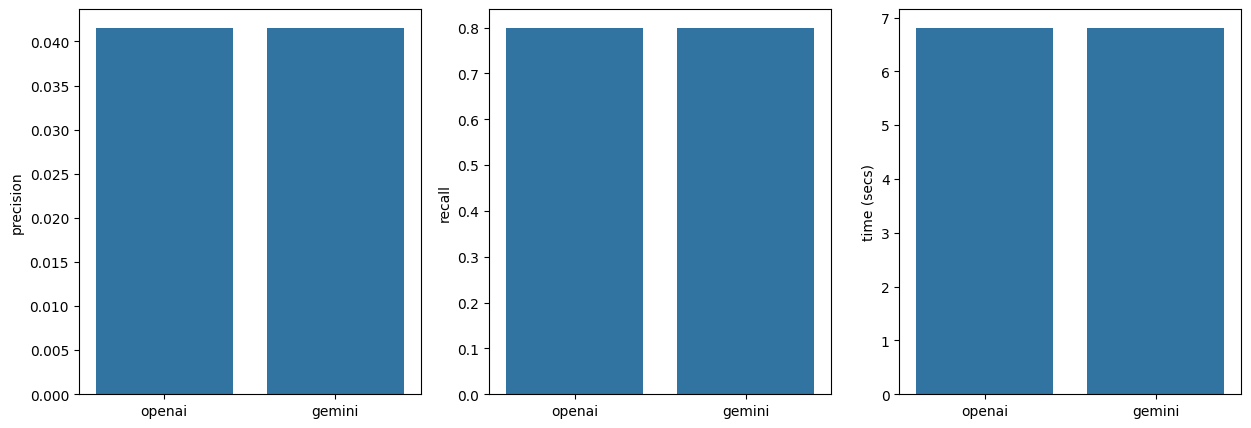

In [16]:
plot = llm_evaluator.compare(
    {
        "openai": openai_results,
        "gemini": gemini_results,
    }
)
plot.show()